# Задача 3
# Вариант 7

Условия задания

$ K(x,s) = exp(-xs)$

При $z(x) = 1$

$u(x) = \frac{1 - exp(-x)}{x}$

Входные условия и вычисление функций $P_k(x)$ и $w_k(x)$

In [1]:
import numpy as np
from scipy.integrate import quad
import math
import matplotlib.pyplot as plt
from pandas import DataFrame


def K(x, s):
    return math.exp(-x * s)

def P_func(n, x):
    if n == 0:
        return 1
    if n == 1:
        return x

    prev_funcs = [1, x]
    for i in range(n + 1):
        new_func = (2 * n + 1) * x * prev_funcs[i - 1] / (n + 1) - \
                   i * prev_funcs[i - 2] / (i +  1)
        prev_funcs.append(new_func)

    return prev_funcs[n]


def w_func(k, x):
    return P_func(k - 1, 2 * x - 1)

def u(x):
    return (1 - math.exp(-x)) / x

def z(x):
    return 1.0

Функция реализующая метод Галеркина и возвращающая функцию $z(x)$

In [2]:
def calculate_galerkin_method(n, alpha, K, u):
    def Z(x, C, n):
        ans = 0
        for k in range(1, n):
            ans += C[k - 1, 0] * w_func(k, x)
        return ans

    B = []
    for j in range(1, n + 1):
        row = []
        for k in range(1, n + 1):
            left_part = lambda x: quad(lambda s, x: K(x, s) * w_func(k, s), 0, 1, args=(x,))[0]
            full_scalar = quad(lambda x: left_part(x) * w_func(j, x), 0, 1)[0]
            row.append(full_scalar)
        B.append(row)
    B = np.array(B)

    U = []
    for j in range(1, n + 1):
        new_value = quad(lambda x: u(x) * w_func(j, x), 0, 1)[0]
        U.append(new_value)
    U = np.array(U).reshape(n, 1)

    B_conj = np.conj(B)

    C = np.linalg.solve(B_conj.dot(B) + alpha * np.eye(n), B_conj.dot(U))

    return lambda x: Z(x, C, n)

Вычисление таблицы ошибок для функции $z(x) = 1$ полученной методом Галеркина

In [3]:
N = [i for i in range(2, 11)]
Alpha = [10 ** (-i) for i in range(5, 16)]

table = []

x_line = np.linspace(0, 1, 100)
for n in N:
    row = []
    for alpha in Alpha:
        z_func = calculate_galerkin_method(n, alpha, K, u)
        z_orig_vect = np.array([z(x) for x in x_line])
        z_galerkin_vect = np.array([z_func(x) for x in x_line])
        delta = np.linalg.norm(z_orig_vect - z_galerkin_vect)
        row.append(delta)
    table.append(row)

df = DataFrame(table, index=N, columns=Alpha)
df

,1.000000e-05,1.000000e-06,1.000000e-07,1.000000e-08,1.000000e-09,1.000000e-10,1.000000e-11,1.000000e-12,1.000000e-13,1.000000e-14,1.000000e-15
2,0.001317,0.000134,0.000013,0.000001,1.341833e-07,1.341835e-08,1.341838e-09,1.341771e-10,1.341927e-11,1.328937e-12,1.265654e-13
3,2.300346,2.007280,0.883807,0.133974,1.412610e-02,1.420336e-03,1.421113e-04,1.420897e-05,1.419086e-06,1.420665e-07,1.266613e-08
4,2.133918,1.853357,0.799971,0.119689,1.259374e-02,1.266005e-03,1.270983e-04,7.256750e-05,2.016225e-04,4.385055e-04,5.571938e-02
5,2.110223,1.795136,1.506354,1.452294,1.446417e+00,1.445822e+00,1.445742e+00,1.445695e+00,1.444882e+00,1.424623e+00,1.071205e+00
6,1.828430,1.073253,0.555220,0.521477,4.890990e-01,3.054138e-01,6.423573e-02,7.221231e-03,7.339564e-04,7.407292e-05,9.079640e-06
7,2.830797,1.947479,1.656335,1.646324,1.648032e+00,1.660035e+00,1.674575e+00,1.678790e+00,1.682477e+00,1.807797e+00,2.535248e+00
8,2.544784,1.145852,0.434165,0.407088,2.804587e-01,1.442390e-01,1.333424e-01,1.333392e-01,1.363802e-01,1.383775e-01,2.244129e-01
9,3.189618,1.949309,1.826025,1.833988,1.820206e+00,1.823817e+00,1.827190e+00,1.810217e+00,1.658780e+00,8.361800e-01,1.604698e-01
10,3.970094,1.898308,1.410980,1.359863,1.294306e+00,1.244501e+00,1.238375e+00,1.233111e+00,1.200994e+00,8.718274e-01,1.729171e+00


Вывод оптимальных $n$ и $\alpha$

In [4]:
table = np.array(table)
i, j = np.unravel_index(table.argmin(), table.shape)

optimal_n = N[i]
optimal_alpha = Alpha[j]

print(f"Optimal n = {optimal_n}")
print(f"Optimal alpha = {optimal_alpha}")

Optimal n = 2
Optimal alpha = 1e-15


Графики функции $z(x) = 1$ и функции $z(x)$ полученной методом Галеркина

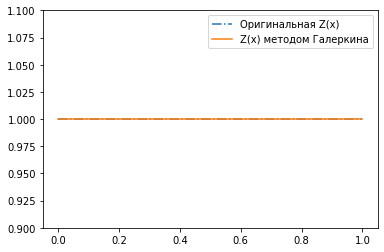

In [5]:
z_func = calculate_galerkin_method(optimal_n, optimal_alpha, K, u)
z_orig_vect = np.array([z(x) for x in x_line])
z_galerkin_vect = np.array([z_func(x) for x in x_line])

plt.plot(x_line, z_orig_vect, "-.", label="Оригинальная Z(x)")
plt.plot(x_line, z_galerkin_vect, "-", label="Z(x) методом Галеркина")
plt.ylim((0.9,1.1))
plt.legend()
plt.show()


Рассмотрим $z(x) = x$

Тогда $u(x) = \frac{1 - e^x(x+1)}{x^2}$

Новые функции $z(s)$ и $u(x)$

In [6]:
def z(x):
    return x

def u(x):
    return (1 - math.exp(-x) * (x + 1)) / (x ** 2)

Вывод таблицы ошибок для новых функций

In [7]:
N = [i for i in range(2, 11)]
Alpha = [10 ** (-i) for i in range(5, 16)]

table = []

x_line = np.linspace(0, 1, 100)
for n in N:
    row = []
    for alpha in Alpha:
        z_func = calculate_galerkin_method(n, alpha, K, u)
        z_orig_vect = np.array([z(x) for x in x_line])
        z_galerkin_vect = np.array([z_func(x) for x in x_line])
        delta = np.linalg.norm(z_orig_vect - z_galerkin_vect)
        row.append(delta)
    table.append(row)

df = DataFrame(table, index=N, columns=Alpha)
df

,1.000000e-05,1.000000e-06,1.000000e-07,1.000000e-08,1.000000e-09,1.000000e-10,1.000000e-11,1.000000e-12,1.000000e-13,1.000000e-14,1.000000e-15
2,2.915777,2.915765,2.915765,2.915765,2.915765,2.915765,2.915765,2.915765,2.915765e+00,2.915765e+00,2.915765e+00
3,0.935847,0.811590,0.357199,0.054145,0.005709,0.000574,0.000057,0.000006,5.739047e-07,5.738174e-08,5.120569e-09
4,2.272217,2.254494,2.214446,2.209429,2.210147,2.210247,2.210262,2.210284,2.209562e+00,2.216451e+00,2.267463e+00
5,0.598724,0.539963,0.486212,0.476091,0.474989,0.474879,0.474878,0.475064,4.760150e-01,4.899212e-01,5.570155e-01
6,1.233169,1.166451,1.134628,1.124842,1.057022,0.660145,0.138844,0.015606,1.580221e-03,1.586265e-04,1.598832e-05
7,1.243935,1.065564,0.992791,0.983115,0.960887,0.892156,0.922196,0.942603,9.428813e-01,9.537124e-01,6.636047e-01
8,1.051694,0.807817,0.718334,0.695054,0.607080,0.546857,0.545012,0.545141,5.453129e-01,5.476534e-01,5.522779e-01
9,1.869544,1.639057,1.639558,1.636306,1.601306,1.594851,1.599171,1.585726,1.462733e+00,8.210332e-01,2.026823e-01
10,2.040708,1.445238,1.308331,1.276711,1.181491,1.107527,1.099762,1.095937,1.077280e+00,9.316228e-01,8.428695e-02


Вывод оптимальных $n$ и $\alpha$ для новых функций

In [8]:
table = np.array(table)
i, j = np.unravel_index(table.argmin(), table.shape)

optimal_n = N[i]
optimal_alpha = Alpha[j]

print(f"Optimal N = {optimal_n}")
print(f"Optimal alpha = {optimal_alpha}")


Optimal N = 3
Optimal alpha = 1e-15


Графики функции $z(x) = x$ и функции $z(x)$ полученной методом Галеркина

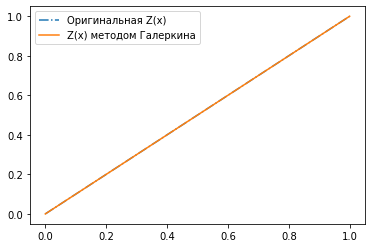

In [9]:
z_func = calculate_galerkin_method(optimal_n, optimal_alpha, K, u)
z_orig_vect = np.array([z(x) for x in x_line])
z_galerkin_vect = np.array([z_func(x) for x in x_line])

plt.plot(x_line, z_orig_vect, "-.", label="Оригинальная Z(x)")
plt.plot(x_line, z_galerkin_vect, "-", label="Z(x) методом Галеркина")
plt.legend()
plt.show()